# SVM (Support Vector Machine)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## SVC (SupportVectorClassifier)

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state=42)

In [3]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [4]:
df = pd.DataFrame(iris_data.data[:, :2], 
             columns=iris_data.feature_names[:2])
df['target'] = iris_data.target
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [5]:
X = iris_data.data[:, :2]
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
svm_slf = SVC(kernel='linear', C=1.0)             # C값을 통해 오류 허용도 지정. (c값이 작아지면 오류 허용도가 커짐 )
svm_slf.fit(X_train, y_train)
svm_slf.score(X_train, y_train), svm_slf.score(X_test, y_test)

(0.7946428571428571, 0.8421052631578947)

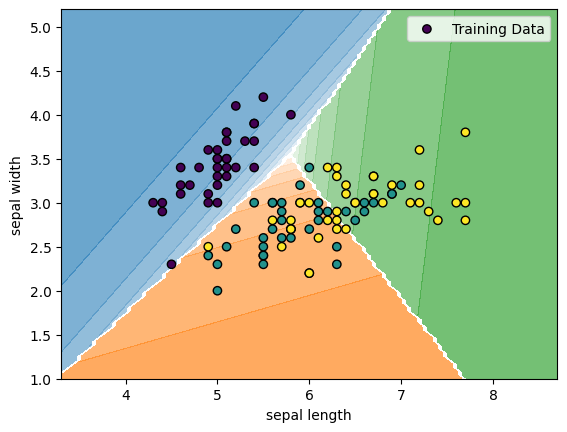

In [7]:
from sklearn.inspection import DecisionBoundaryDisplay

dbd = DecisionBoundaryDisplay.from_estimator(svm_slf, X_train, alpha = 0.7)        # alpha = 투명도 결정 조건

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, edgecolors='k', label='Training Data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

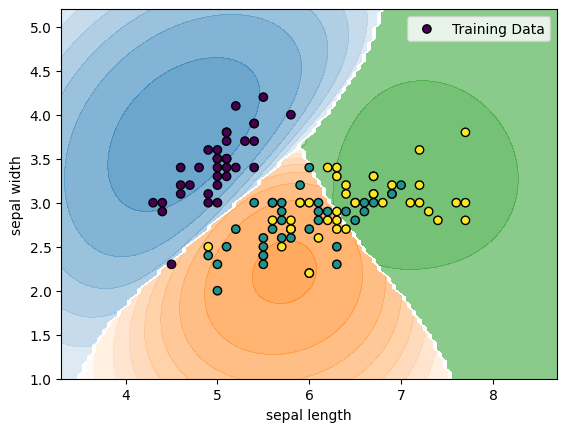

In [8]:
svm_clf = SVC(kernel='rbf', C=1.0, gamma=0.5)   # 비선형 / gamma = 커널이 rbf 일때 쓰는 하이퍼 파라미터. 커질수록 데이터포인트의 영향범위가 줄어듦.(복잡, 과적합)
svm_clf.fit(X_train, y_train)

dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha = 0.7)        # alpha = 투명도 결정 조건

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, edgecolors='k', label='Training Data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

## SVR (SupportVectorRegressor)

깃

In [9]:
np.random.seed(0)
X = np.sort(np.random.rand(40, 1) * 5, axis = 0)
y = np.sin(X).ravel() + np.random.randn(40) * 0.1

X_test = np.linspace(0, 5, 100).reshape(-1, 1)

In [10]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_ploy = SVR(kernel='poly')

svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_ploy.fit(X, y)

pred_rbf = svr_rbf.predict(X_test)
pred_lin = svr_lin.predict(X_test)
pred_ploy = svr_ploy.predict(X_test)


0.1


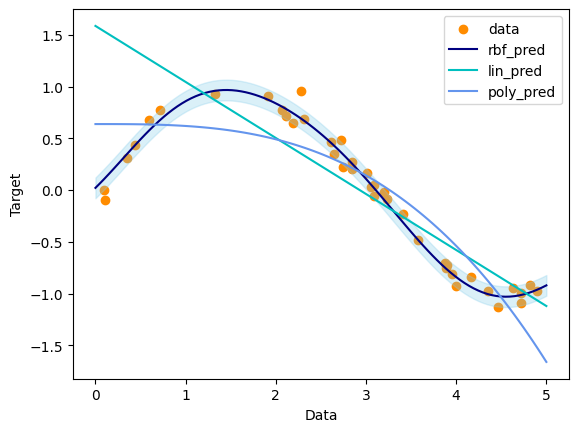

In [11]:
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, pred_rbf, color='navy', label='rbf_pred')
plt.plot(X_test, pred_lin, color='c', label="lin_pred")
plt.plot(X_test, pred_ploy, color='cornflowerblue', label='poly_pred')

svr_rbf_epsilon = svr_rbf.epsilon       # 앱실론 튜프를 그려라
print(svr_rbf_epsilon)
epsilon_upper = pred_rbf + svr_rbf_epsilon
epsilon_lower = pred_rbf - svr_rbf_epsilon
plt.fill_between(X_test.ravel(), epsilon_lower, epsilon_upper, color="skyblue", alpha=0.3)

plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.show()

### 캘리포니아 주택 가격 예상  (y값 스케일링이 필요함. inverse_transfrom 사용 확인)

In [12]:
# 데이터 로드 
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터 분리 및 스케일링
X = housing_data.data
y = housing_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [14]:
# # 데이터 분리 및 스케일링
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# scaler = standerdscaler()

# from sklearn.svm import SVR
# dt_reg = SVR(random_state=0, max_depth=3)
# dt_reg.fit(X_train, y_train)


# # 예측
# pred_train = dt_reg.predict(X_train)
# pred_tast = dt_reg.predict(X_test)


In [ ]:
# SVR 모델 훈련 및 평가 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

svr_model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))   # 스케일 제거

mean_squared_error(y_test, y_pred)   # 0.34791 스케일링 처리를 안한 것보단 손실이 줄어듦 (target 데이터의 범위가 크지 않아서 다이나믹하지는 않음)

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3479132306095666

In [ ]:
# plt.scatter(X, y, color='darkorange', label='data')
# plt.plot(X_test, pred_rbf, color='navy', label='rbf_pred')
# plt.plot(X_test, pred_lin, color='c', label="lin_pred")
# plt.plot(X_test, pred_ploy, color='cornflowerblue', label='poly_pred')

# svr_rbf_epsilon = svr_rbf.epsilon       # 앱실론 튜프를 그려라
# print(svr_rbf_epsilon)
# epsilon_upper = pred_rbf + svr_rbf_epsilon
# epsilon_lower = pred_rbf - svr_rbf_epsilon
# plt.fill_between(X_test.ravel(), epsilon_lower, epsilon_upper, color="skyblue", alpha=0.3)

# plt.xlabel('Data')
# plt.ylabel('Target')
# plt.legend()
# plt.show()